In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SWPLA_Dataset/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SWPLA_Dataset/test.csv')
train.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
0,-999.0,-999.0,41.4699,-999.0,-999.0,-999.0,-999.0,128.0737,319.0654
1,-999.0,-999.0,42.5053,-999.0,-999.0,-999.0,-999.0,127.8347,318.7825
2,-999.0,-999.0,43.1548,-999.0,-999.0,-999.0,-999.0,127.2307,317.3323
3,-999.0,-999.0,43.2410,-999.0,-999.0,-999.0,-999.0,126.2917,313.6486
4,-999.0,-999.0,40.3218,-999.0,-999.0,-999.0,-999.0,125.3985,307.8903


In [ ]:
test.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN
0,8.5781,0.3521,55.1824,0.8121,0.7810,6.8291,2.3256
1,8.5781,0.3639,57.0114,0.8038,0.7723,6.8100,2.3255
2,8.5781,0.3703,58.9263,0.7444,0.7048,6.7766,2.3212
3,8.5625,0.3667,57.3308,0.7169,0.6542,6.7219,2.3119
4,8.5781,0.3500,53.0624,0.6845,0.6109,6.6384,2.2982


In [ ]:
# remove all rows that contains missing value
import numpy as np
train.replace(['-999', -999], np.nan, inplace=True)
train.dropna(axis=0, inplace=True)
train.describe()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
count,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000,20525.000000
mean,8.426679,0.274416,49.889253,2.598719,5.835466,3.833792,2.410734,88.312221,182.051067
std,1.845912,3.062495,54.811017,3.465665,422.449589,4.375818,0.181713,23.542419,84.670122
min,5.930400,0.014500,1.038900,0.123600,0.134100,-0.023200,0.680600,49.970500,80.580400
25%,6.629100,0.120300,16.036800,0.810000,0.797300,0.049800,2.236100,70.423100,127.148800
50%,8.578100,0.187700,37.498000,1.814900,1.829300,3.287800,2.466500,79.695400,142.678500
75%,8.671900,0.329000,61.140700,3.337400,3.463300,7.061300,2.563700,102.482800,192.757800
max,21.064200,365.885000,1470.253400,206.718200,60467.761700,28.106400,3.259700,155.980300,487.438400


In [ ]:
train = pd.DataFrame(train) 
train.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
573,14.8824,0.5173,57.1903,1.9826,1.9726,27.9432,2.3510,125.9611,306.8676
574,14.9570,0.4966,63.1593,2.0472,1.6373,28.1064,2.4055,125.9726,305.8347
575,14.6341,0.4433,64.5217,2.0464,1.4866,26.5968,2.4579,125.8528,305.9089
576,14.2318,0.4309,63.0144,2.0054,1.4613,19.5635,2.4219,125.7362,305.1737
577,14.0163,0.4469,60.8421,1.9533,1.4438,9.8556,2.3138,125.9774,304.4476


In [ ]:
train_DTC = train.iloc[:,np.r_[0:8]]
train_DTC.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC
573,14.8824,0.5173,57.1903,1.9826,1.9726,27.9432,2.3510,125.9611
574,14.9570,0.4966,63.1593,2.0472,1.6373,28.1064,2.4055,125.9726
575,14.6341,0.4433,64.5217,2.0464,1.4866,26.5968,2.4579,125.8528
576,14.2318,0.4309,63.0144,2.0054,1.4613,19.5635,2.4219,125.7362
577,14.0163,0.4469,60.8421,1.9533,1.4438,9.8556,2.3138,125.9774


In [ ]:
!pip install pycaret

     |████████████████████████████████| 194kB 2.8MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 133kB 46.7MB/s 
     |████████████████████████████████| 63.9MB 72kB/s 
     |████████████████████████████████| 389kB 44.1MB/s 
     |████████████████████████████████| 7.0MB 39.1MB/s 
     |████████████████████████████████| 266kB 51.2MB/s 
     |████████████████████████████████| 1.2MB 39.2MB/s 
     |████████████████████████████████| 3.0MB 36.9MB/s 
     |████████████████████████████████| 81kB 10.9MB/s 
     |████████████████████████████████| 1.6MB 37.4MB/s 
     |████████████████████████████████| 102kB 13.3MB/s 
     |████████████████████████████████| 235kB 52.8MB/s 
     |████████████████████████████████| 614kB 40.1MB/s 
     |████████████████████████████████| 6.1MB 43.1MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 71kB 10.7MB/s 
     |████████████████████████████████| 552kB 51.5MB/s 


In [ ]:
from pycaret.regression import *
reg1 = setup(train_DTC, target = 'DTC', session_id = 123, silent = True) #silent is set to True for unattended run during kernel execution

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(20525, 8)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
compare_models(blacklist = ['tr']) #blacklisted Thielsen Regressor due to longer training times

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.393500,6.282000,2.499700,0.988700,0.027400,0.015900
1,Random Forest,1.624400,8.495400,2.903100,0.984700,0.031900,0.018600
2,CatBoost Regressor,1.987500,9.693700,3.110100,0.982500,0.034400,0.022800
3,Light Gradient Boosting Machine,1.990900,9.990500,3.155000,0.982000,0.034800,0.022900
4,Gradient Boosting Regressor,2.369600,13.293000,3.642500,0.976000,0.040200,0.027200
5,Extreme Gradient Boosting,2.374400,13.444400,3.662800,0.975800,0.040400,0.027300
6,Decision Tree,2.053700,15.172000,3.885800,0.972700,0.042600,0.023500
7,K Neighbors Regressor,3.043800,25.750700,5.073300,0.953500,0.055300,0.034300
8,AdaBoost Regressor,4.296000,29.464400,5.425800,0.946800,0.063600,0.051800
9,Orthogonal Matching Pursuit,11.024300,197.490900,14.044500,0.644400,0.153100,0.120700


In [ ]:
#verbose set to False to avoid printing score grid
etregressor = create_model('et', verbose = False)
randomf = create_model('rf', verbose = False)
catboost = create_model('catboost', verbose = False)

In [ ]:
blend_top_3 = blend_models(estimator_list = [etregressor, randomf, catboost])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.4997,5.6726,2.3817,0.9898,0.0264,0.0173
1,1.6352,7.6304,2.7623,0.9866,0.0304,0.0188
2,1.6489,8.0944,2.8451,0.9858,0.0311,0.0186
3,1.6462,8.0795,2.8424,0.9863,0.0305,0.0186
4,1.6416,7.4940,2.7375,0.9867,0.0301,0.0187
5,1.5404,6.4752,2.5446,0.9883,0.0286,0.0179
6,1.6418,7.3705,2.7149,0.9867,0.0299,0.0188
7,1.4763,6.2628,2.5026,0.9881,0.0281,0.0171
8,1.6330,8.2755,2.8767,0.9833,0.0313,0.0187
9,1.6824,8.8363,2.9726,0.9847,0.0326,0.0190


In [ ]:
stack1 = stack_models(estimator_list = [randomf, catboost], meta_model = etregressor, restack = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.5075,6.3916,2.5282,0.9885,0.0279,0.0173
1,1.6160,8.0630,2.8395,0.9858,0.0311,0.0185
2,1.6495,8.6829,2.9467,0.9848,0.0321,0.0185
3,1.6756,8.8398,2.9732,0.9850,0.0321,0.0190
4,1.6654,8.2336,2.8694,0.9853,0.0313,0.0188
5,1.5713,7.3028,2.7024,0.9868,0.0305,0.0183
6,1.6732,8.1635,2.8572,0.9852,0.0313,0.0190
7,1.5153,7.0706,2.6591,0.9866,0.0299,0.0175
8,1.6339,8.8404,2.9733,0.9821,0.0323,0.0186
9,1.7371,10.3641,3.2193,0.9821,0.0352,0.0195


In [ ]:
from pycaret.regression import *
reg1 = setup(train_DTC, target = 'DTC', session_id = 123, 
             normalize = True, normalize_method = 'zscore',
             transformation = True, transformation_method = 'yeo-johnson', transform_target = True,
             ignore_low_variance = True, combine_rare_levels = True,
             numeric_features=['CAL', 'CNC', 'GR', 'HRM', 
                               'HRD', 'PE', 'ZDEN'],
             silent = True #silent is set to True for unattended run during kernel execution
             )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,True
2,Transform Target Method,box-cox
3,Original Data,"(20525, 8)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
compare_models(blacklist = ['tr']) #blacklisted Thielsen Regressor due to longer training times

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.430000,6.869500,2.611100,0.987600,0.028400,0.016200
1,Random Forest,1.613000,8.116200,2.840800,0.985400,0.031200,0.018400
2,K Neighbors Regressor,1.670900,8.871700,2.971400,0.984000,0.032000,0.018800
3,CatBoost Regressor,2.026400,10.236700,3.195000,0.981500,0.034500,0.022900
4,Light Gradient Boosting Machine,2.013700,10.305600,3.205800,0.981400,0.034700,0.022800
5,Support Vector Machine,2.314400,13.057600,3.610300,0.976400,0.038700,0.025800
6,Extreme Gradient Boosting,2.399100,14.018700,3.740500,0.974800,0.040500,0.027100
7,Gradient Boosting Regressor,2.398900,14.048300,3.744100,0.974700,0.040500,0.027100
8,Decision Tree,2.074400,15.064200,3.877000,0.972900,0.042700,0.023700
9,Bayesian Ridge,3.962800,36.519100,6.034500,0.934300,0.058400,0.042400


In [ ]:
etregressor = create_model('et', verbose = False)
catboost = create_model('catboost', verbose = False)
randomf = create_model('rf', verbose = False)
lightgbm = create_model('lightgbm', verbose = False)
knn = create_model('knn', verbose = False)

In [ ]:
blend_top_5 = blend_models(estimator_list = [etregressor,catboost,randomf,lightgbm,knn])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.5510,6.2992,2.5098,0.9887,0.0273,0.0176
1,1.6770,7.9408,2.8179,0.9860,0.0307,0.0191
2,1.6715,8.6793,2.9461,0.9848,0.0316,0.0186
3,1.7123,8.6560,2.9421,0.9853,0.0312,0.0191
4,1.6680,7.7342,2.7810,0.9862,0.0304,0.0188
5,1.5396,6.3034,2.5107,0.9886,0.0276,0.0177
6,1.6653,7.7874,2.7906,0.9859,0.0304,0.0189
7,1.5139,6.4622,2.5421,0.9878,0.0283,0.0174
8,1.6859,9.2498,3.0413,0.9813,0.0329,0.0191
9,1.7126,8.9875,2.9979,0.9845,0.0326,0.0192


In [ ]:
stack2 = stack_models(estimator_list = [catboost,randomf,lightgbm,knn], meta_model = etregressor, restack = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.4180,5.6677,2.3807,0.9898,0.0262,0.0162
1,1.5592,7.6145,2.7594,0.9866,0.0300,0.0178
2,1.5837,8.7656,2.9607,0.9846,0.0317,0.0176
3,1.6336,8.9209,2.9868,0.9848,0.0319,0.0183
4,1.5623,7.4332,2.7264,0.9868,0.0295,0.0175
5,1.4483,6.2260,2.4952,0.9887,0.0279,0.0167
6,1.5942,7.9298,2.8160,0.9857,0.0303,0.0179
7,1.4195,6.4783,2.5453,0.9877,0.0281,0.0162
8,1.5920,9.2521,3.0417,0.9813,0.0330,0.0180
9,1.5953,8.6726,2.9449,0.9850,0.0321,0.0178


In [ ]:
from pycaret.regression import *
reg1 = setup(train_DTC, target = 'DTC', session_id = 123, 
             normalize = True, normalize_method = 'zscore',
             transformation = True, transformation_method = 'yeo-johnson', transform_target = True,
             numeric_features=['CAL', 'CNC', 'GR', 'HRM', 
                               'HRD', 'PE', 'ZDEN'],
             polynomial_features = True, trigonometry_features = True, remove_outliers = True, outliers_threshold = 0.05,
             silent = True #silent is set to True for unattended run during kernel execution
             )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,True
2,Transform Target Method,box-cox
3,Original Data,"(20525, 8)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
compare_models(blacklist = ['tr']) #blacklisted Thielsen Regressor due to longer training times

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.529600,7.937500,2.809500,0.984200,0.030700,0.017500
1,Random Forest,1.615000,8.297800,2.874800,0.983500,0.031600,0.018500
2,K Neighbors Regressor,1.690900,9.217200,3.030400,0.981600,0.032900,0.019100
3,Light Gradient Boosting Machine,1.975100,10.041400,3.164800,0.980000,0.034500,0.022600
4,CatBoost Regressor,2.015300,10.139100,3.179200,0.979800,0.034700,0.023000
5,Support Vector Machine,2.252200,12.495100,3.528800,0.975100,0.038300,0.025500
6,Extreme Gradient Boosting,2.365200,14.023400,3.742800,0.972000,0.040600,0.027000
7,Gradient Boosting Regressor,2.365800,14.154700,3.759900,0.971800,0.040700,0.027000
8,Decision Tree,2.072900,15.991500,3.997600,0.968100,0.044200,0.023900
9,Ridge Regression,3.385200,25.665600,5.062800,0.948800,0.052400,0.037300


In [ ]:
huber = tune_model('huber', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.3310,26.1393,5.1127,0.9459,0.0527,0.0367
1,3.3548,26.8023,5.1771,0.9489,0.0537,0.0367
2,3.3026,23.3563,4.8328,0.9543,0.0510,0.0367
3,3.4472,26.4616,5.1441,0.9496,0.0522,0.0375
4,3.2813,24.2098,4.9203,0.9490,0.0519,0.0368
5,3.3431,25.1243,5.0124,0.9504,0.0520,0.0368
6,3.3085,24.6573,4.9656,0.9517,0.0507,0.0363
7,3.3578,26.2305,5.1216,0.9464,0.0530,0.0374
8,3.3962,26.6900,5.1662,0.9436,0.0528,0.0375
9,3.5514,30.5727,5.5293,0.9407,0.0568,0.0389


In [ ]:
omp = tune_model('omp', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.3352,25.7375,5.0732,0.9467,0.0525,0.0368
1,3.3650,26.5220,5.1500,0.9495,0.0534,0.0369
2,3.3248,23.1280,4.8092,0.9548,0.0508,0.0369
3,3.4617,26.4245,5.1405,0.9497,0.0522,0.0377
4,3.3011,24.0638,4.9055,0.9494,0.0517,0.0369
5,3.3552,24.7606,4.9760,0.9512,0.0516,0.0370
6,3.3080,24.4198,4.9416,0.9522,0.0504,0.0363
7,3.3711,25.9467,5.0938,0.9470,0.0526,0.0375
8,3.4073,26.2542,5.1239,0.9445,0.0524,0.0376
9,3.5842,30.4433,5.5175,0.9410,0.0567,0.0392


In [ ]:
ridge = tune_model('ridge', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.3418,25.6110,5.0607,0.9470,0.0524,0.0368
1,3.3661,26.3956,5.1377,0.9497,0.0533,0.0369
2,3.3231,23.0635,4.8025,0.9549,0.0508,0.0370
3,3.4724,26.3950,5.1376,0.9498,0.0521,0.0378
4,3.2936,23.8872,4.8875,0.9497,0.0516,0.0369
5,3.3558,24.6400,4.9639,0.9514,0.0516,0.0370
6,3.3121,24.3425,4.9338,0.9523,0.0504,0.0363
7,3.3805,25.9349,5.0926,0.9470,0.0527,0.0376
8,3.4121,26.2773,5.1261,0.9445,0.0525,0.0377
9,3.5870,30.3287,5.5071,0.9412,0.0566,0.0393


In [ ]:
br = tune_model('br', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.3429,25.5983,5.0595,0.9470,0.0524,0.0368
1,3.3660,26.3820,5.1363,0.9497,0.0533,0.0369
2,3.3237,23.0608,4.8022,0.9549,0.0508,0.0370
3,3.4742,26.3950,5.1376,0.9498,0.0521,0.0378
4,3.2939,23.8728,4.8860,0.9498,0.0516,0.0369
5,3.3567,24.6311,4.9630,0.9514,0.0516,0.0370
6,3.3126,24.3305,4.9326,0.9523,0.0504,0.0363
7,3.3816,25.9317,5.0923,0.9470,0.0527,0.0376
8,3.4128,26.2783,5.1262,0.9445,0.0525,0.0377
9,3.5868,30.3128,5.5057,0.9412,0.0566,0.0393


In [ ]:
lightgbm = tune_model('lightgbm', n_iter = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.8559,9.2141,3.0355,0.9809,0.0330,0.0211
1,1.8110,8.8642,2.9773,0.9831,0.0321,0.0206
2,1.7614,8.3984,2.8980,0.9836,0.0325,0.0204
3,1.8067,9.3959,3.0653,0.9821,0.0327,0.0204
4,1.7374,8.0990,2.8459,0.9830,0.0316,0.0202
5,1.7443,7.4416,2.7279,0.9853,0.0303,0.0200
6,1.7178,7.8032,2.7934,0.9847,0.0303,0.0196
7,1.7318,8.3081,2.8824,0.9830,0.0313,0.0199
8,1.7604,7.8278,2.7978,0.9835,0.0310,0.0203
9,1.9670,11.0349,3.3219,0.9786,0.0358,0.0221


In [ ]:
par = tune_model('par', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.7491,29.7449,5.4539,0.9384,0.0564,0.0415
1,3.8077,30.6020,5.5319,0.9417,0.0571,0.0420
2,3.7527,27.2573,5.2209,0.9467,0.0554,0.0421
3,3.9134,31.0298,5.5704,0.9410,0.0567,0.0428
4,3.7444,28.8126,5.3677,0.9394,0.0559,0.0419
5,3.7907,29.0685,5.3915,0.9427,0.0558,0.0419
6,3.6970,27.7778,5.2705,0.9456,0.0542,0.0409
7,3.8438,31.1606,5.5822,0.9364,0.0573,0.0428
8,3.8348,30.8156,5.5512,0.9349,0.0572,0.0427
9,4.3877,41.7843,6.4641,0.9190,0.0631,0.0461


In [ ]:
blend_all = blend_models(estimator_list = [huber, omp, ridge, br, lightgbm])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.9112,19.9914,4.4712,0.9586,0.0466,0.0322
1,2.9240,20.4500,4.5222,0.9610,0.0471,0.0321
2,2.8898,17.7486,4.2129,0.9653,0.0450,0.0323
3,3.0090,20.3683,4.5131,0.9612,0.0461,0.0328
4,2.8435,18.2817,4.2757,0.9615,0.0455,0.0320
5,2.8858,18.4648,4.2971,0.9636,0.0450,0.0320
6,2.8467,18.1682,4.2624,0.9644,0.0439,0.0314
7,2.9117,19.6173,4.4291,0.9599,0.0462,0.0325
8,2.9533,19.8887,4.4597,0.9580,0.0460,0.0327
9,3.1083,23.3534,4.8325,0.9547,0.0502,0.0341


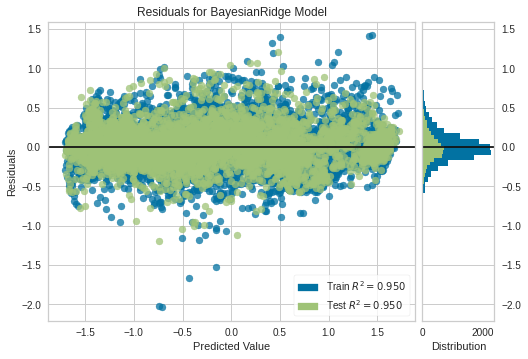

In [ ]:
plot_model(br, plot = 'residuals')

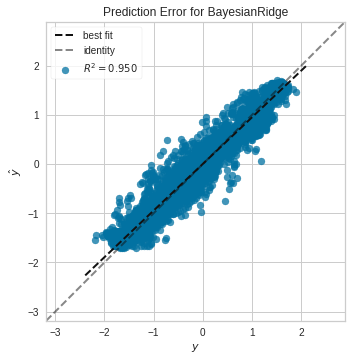

In [ ]:
plot_model(br, plot = 'error')

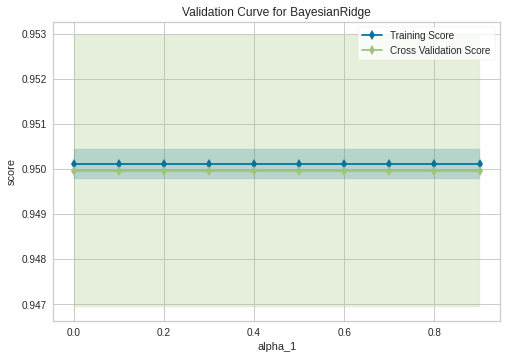

In [ ]:
plot_model(br, plot = 'vc')

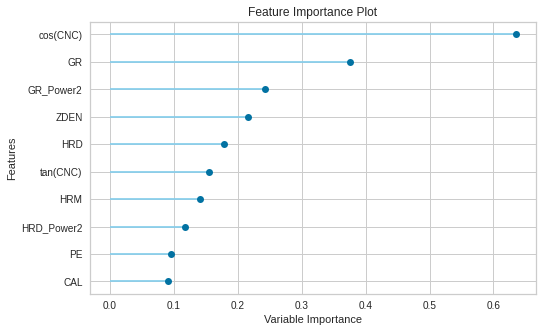

In [ ]:
plot_model(br, plot = 'feature')

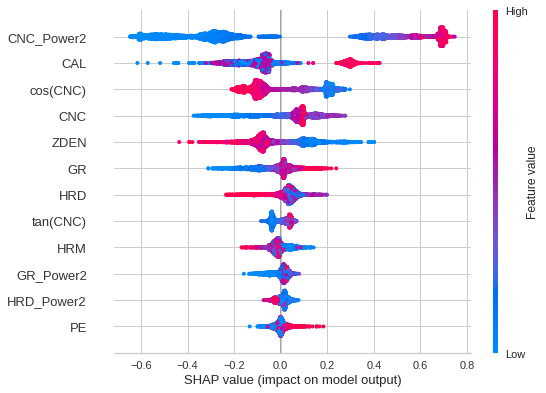

In [ ]:
interpret_model(lightgbm)

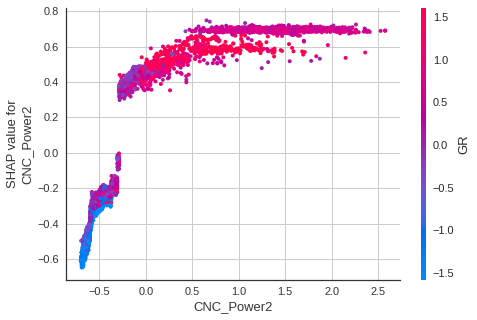

In [ ]:
interpret_model(lightgbm, plot = 'correlation', feature = 'CNC_Power2')

In [ ]:
interpret_model(lightgbm, plot = 'reason', observation = 0)

In [ ]:
# check predictions on hold-out
predict_model(blend_all);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,2.8657,17.572,4.1919,0.9653,0.0447,0.0321


In [ ]:
final_blender = finalize_model(blend_all)
print(final_blender)

VotingRegressor(estimators=[('Huber Regressor_0',
                             HuberRegressor(alpha=0.4274, epsilon=1.9,
                                            fit_intercept=False, max_iter=100,
                                            tol=1e-05, warm_start=False)),
                            ('Orthogonal Matching Pursuit_1',
                             OrthogonalMatchingPursuit(fit_intercept=True,
                                                       n_nonzero_coefs=12,
                                                       normalize=False,
                                                       precompute='auto',
                                                       tol=None)),
                            ('Ridge_2',
                             Ridge(alpha=0.047, copy_X=True, fit_intercept=True,...
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           import

In [ ]:
predictions_DTC = predict_model(final_blender, data = test)
predictions_DTC.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,Label
0,8.5781,0.3521,55.1824,0.8121,0.7810,6.8291,2.3256,108.5065
1,8.5781,0.3639,57.0114,0.8038,0.7723,6.8100,2.3255,108.8330
2,8.5781,0.3703,58.9263,0.7444,0.7048,6.7766,2.3212,109.7977
3,8.5625,0.3667,57.3308,0.7169,0.6542,6.7219,2.3119,109.9252
4,8.5781,0.3500,53.0624,0.6845,0.6109,6.6384,2.2982,110.3204


In [ ]:
predictions_DTC.rename(columns={'Label': 'DTC'}, inplace = True)
predictions_DTC.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC
0,8.5781,0.3521,55.1824,0.8121,0.7810,6.8291,2.3256,108.5065
1,8.5781,0.3639,57.0114,0.8038,0.7723,6.8100,2.3255,108.8330
2,8.5781,0.3703,58.9263,0.7444,0.7048,6.7766,2.3212,109.7977
3,8.5625,0.3667,57.3308,0.7169,0.6542,6.7219,2.3119,109.9252
4,8.5781,0.3500,53.0624,0.6845,0.6109,6.6384,2.2982,110.3204


In [ ]:
test20perc = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SWPLA_Dataset/real_result_20perc.csv')

In [ ]:
test20perc = test20perc.iloc[:,np.r_[0:7]]
test20perc.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN
0,8.6719,0.1199,6.7518,2.8285,3.0391,8.4395,2.5191
1,8.6719,0.3180,165.4345,1.3170,1.2206,7.1354,2.5517
2,8.7031,0.3164,58.3146,1.1627,1.8947,8.1722,2.4452
3,8.6250,0.1527,44.5126,2.5318,3.0052,7.6534,2.5674
4,8.6250,0.1731,16.1563,13.5082,13.0191,5.1534,2.2164


In [ ]:
test20perc1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SWPLA_Dataset/real_result_20perc.csv')

In [ ]:
test20perc_DTC_DTS = test20perc1.iloc[:,np.r_[7:9]].values
print(test20perc_DTC_DTS)

[[ 67.5481 124.2332]
 [101.5208 201.2649]
 [110.8297 250.7232]
 ...
 [ 93.0115 161.6765]
 [ 61.3967 112.0019]
 [ 73.7051 137.8335]]


In [ ]:
predictions_20perc_DTC = predict_model(final_blender, data = test20perc)
predictions_20perc_DTC.rename(columns={'Label': 'DTC'}, inplace = True)
predictions_20perc_DTC.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC
0,8.6719,0.1199,6.7518,2.8285,3.0391,8.4395,2.5191,69.9345
1,8.6719,0.3180,165.4345,1.3170,1.2206,7.1354,2.5517,97.6984
2,8.7031,0.3164,58.3146,1.1627,1.8947,8.1722,2.4452,98.7449
3,8.6250,0.1527,44.5126,2.5318,3.0052,7.6534,2.5674,77.7576
4,8.6250,0.1731,16.1563,13.5082,13.0191,5.1534,2.2164,78.1032


# **DTS**

In [ ]:
train_DTS = train.iloc[:, np.r_[0:9]]
train_DTS.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
573,14.8824,0.5173,57.1903,1.9826,1.9726,27.9432,2.3510,125.9611,306.8676
574,14.9570,0.4966,63.1593,2.0472,1.6373,28.1064,2.4055,125.9726,305.8347
575,14.6341,0.4433,64.5217,2.0464,1.4866,26.5968,2.4579,125.8528,305.9089
576,14.2318,0.4309,63.0144,2.0054,1.4613,19.5635,2.4219,125.7362,305.1737
577,14.0163,0.4469,60.8421,1.9533,1.4438,9.8556,2.3138,125.9774,304.4476


In [ ]:
test_DTS =  predictions_DTC
test_DTS = pd.DataFrame()
test_DTS.describe()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC
count,11088.000000,11088.000000,11088.000000,11088.000000,11088.000000,11088.000000,11088.000000,11088.000000
mean,8.634049,0.158501,28.966414,4.028372,106.752210,7.353522,2.475884,77.805255
std,0.044064,0.091298,43.648163,7.198112,2374.620246,1.239075,0.149440,14.112818
min,8.500000,0.009800,0.852000,0.083900,0.102700,4.760800,2.033400,59.884600
25%,8.625000,0.091700,8.449450,1.760775,1.865575,6.528075,2.378175,66.934525
50%,8.625000,0.128300,18.168650,2.758900,3.176950,7.881700,2.533600,72.549400
75%,8.671900,0.213500,36.470725,4.539675,5.034600,8.308325,2.581800,86.346425
max,8.875000,0.559400,1124.442000,202.233000,62290.769500,13.840700,3.024800,127.403900


In [ ]:
test20perc = predictions_20perc_DTC
test20perc.describe()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC
count,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000
mean,8.634826,0.158620,30.183575,4.330621,159.877128,7.360546,2.476402,77.830257
std,0.044438,0.090789,49.952910,8.867523,3028.987218,1.255721,0.150628,13.949257
min,8.500000,0.009800,1.235100,0.086100,0.154800,4.780900,2.033400,59.884600
25%,8.625000,0.092000,8.535300,1.770200,1.857600,6.526200,2.377200,66.961600
50%,8.625000,0.128900,19.375200,2.772100,3.197000,7.881300,2.535500,72.926600
75%,8.671900,0.214200,37.201300,4.511500,5.029100,8.308300,2.582500,86.161200
max,8.781300,0.543400,1000.892000,196.786200,62290.769500,13.741000,3.006900,125.401900


In [ ]:
from pycaret.regression import *
reg1 = setup(train_DTS, target = 'DTS', session_id = 123, silent = True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(20525, 9)"
4,Missing Values,False
5,Numeric Features,8
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
compare_models(blacklist = ['tr']) #blacklisted Thielsen Regressor due to longer training times

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,2.846800,33.499500,5.756200,0.995400,0.026100,0.014200
1,Random Forest,3.310400,47.755700,6.820300,0.993400,0.030800,0.016700
2,CatBoost Regressor,4.407900,55.382500,7.426400,0.992300,0.034700,0.022900
3,Light Gradient Boosting Machine,4.401700,59.431200,7.667600,0.991800,0.035600,0.022900
4,Decision Tree,4.169200,85.005600,9.145600,0.988200,0.041800,0.021100
5,Extreme Gradient Boosting,5.651500,87.546700,9.335600,0.987800,0.044200,0.029800
6,Gradient Boosting Regressor,5.641400,87.158500,9.316100,0.987800,0.044200,0.029800
7,K Neighbors Regressor,5.661100,137.293900,11.676700,0.980900,0.048700,0.027300
8,AdaBoost Regressor,10.041400,177.987400,13.337000,0.975100,0.076900,0.061000
9,Lasso Regression,10.911100,349.523900,18.673900,0.951300,0.074800,0.053700


In [ ]:
#verbose set to False to avoid printing score grid
etregressor = create_model('et', verbose = False)
randomf = create_model('rf', verbose = False)
catboost = create_model('catboost', verbose = False)

In [ ]:
blend_top_3 = blend_models(estimator_list = [etregressor, randomf, catboost])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.0144,31.7810,5.6375,0.9955,0.0251,0.0154
1,3.3485,37.5535,6.1281,0.9950,0.0278,0.0168
2,3.5700,51.1214,7.1499,0.9929,0.0309,0.0178
3,3.8113,60.1960,7.7586,0.9924,0.0342,0.0187
4,3.3206,40.2798,6.3466,0.9944,0.0279,0.0164
5,3.2460,35.0573,5.9209,0.9952,0.0269,0.0165
6,3.3931,39.2671,6.2663,0.9946,0.0289,0.0173
7,2.9671,28.0937,5.3003,0.9958,0.0252,0.0157
8,3.3859,40.1909,6.3396,0.9935,0.0316,0.0183
9,3.5875,41.8734,6.4710,0.9946,0.0306,0.0182


In [ ]:
stack1 = stack_models(estimator_list = [randomf, catboost], meta_model = etregressor, restack = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.8186,32.9979,5.7444,0.9953,0.0245,0.0141
1,3.1538,35.3516,5.9457,0.9953,0.0279,0.0159
2,3.3936,53.3587,7.3047,0.9926,0.0311,0.0167
3,3.5766,56.3562,7.5071,0.9929,0.0341,0.0177
4,3.1516,40.0201,6.3261,0.9945,0.0276,0.0154
5,3.0579,34.3802,5.8635,0.9953,0.0258,0.0151
6,3.2417,42.5053,6.5196,0.9941,0.0298,0.0163
7,2.7763,29.5342,5.4345,0.9955,0.0252,0.0144
8,3.1591,41.2969,6.4263,0.9933,0.0321,0.0170
9,3.4059,44.6756,6.6840,0.9942,0.0306,0.0168


In [ ]:
from pycaret.regression import *
reg1 = setup(train_DTS, target = 'DTS', session_id = 123, 
             normalize = True, normalize_method = 'zscore',
             transformation = True, transformation_method = 'yeo-johnson', transform_target = True,
             ignore_low_variance = True, combine_rare_levels = True,
             numeric_features=['CAL', 'CNC', 'GR', 'HRM', 
                               'HRD', 'PE', 'ZDEN', 'DTC'],
             silent = True #silent is set to True for unattended run during kernel execution
             )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,True
2,Transform Target Method,box-cox
3,Original Data,"(20525, 9)"
4,Missing Values,False
5,Numeric Features,8
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
compare_models(blacklist = ['tr']) #blacklisted Thielsen Regressor due to longer training times

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,2.857600,35.062000,5.888300,0.995100,0.026200,0.014100
1,Random Forest,3.289400,44.107900,6.612100,0.993900,0.030100,0.016500
2,K Neighbors Regressor,4.059100,67.557200,8.188900,0.990600,0.035300,0.019700
3,Light Gradient Boosting Machine,4.720300,78.084800,8.813200,0.989100,0.036600,0.022800
4,Decision Tree,4.087600,79.877300,8.912200,0.988900,0.040500,0.020500
5,CatBoost Regressor,4.793900,80.480000,8.947200,0.988800,0.036200,0.022900
6,Gradient Boosting Regressor,6.040400,117.815200,10.825000,0.983600,0.045600,0.029500
7,Extreme Gradient Boosting,6.049100,118.676000,10.866600,0.983500,0.045700,0.029500
8,Support Vector Machine,6.336200,144.367000,11.994000,0.979900,0.045700,0.029200
9,Orthogonal Matching Pursuit,14.691700,720.301900,26.799700,0.899900,0.091500,0.063300


In [ ]:
etregressor = create_model('et', verbose = False)
catboost = create_model('catboost', verbose = False)
randomf = create_model('rf', verbose = False)
lightgbm = create_model('lightgbm', verbose = False)
knn = create_model('knn', verbose = False)

In [ ]:
blend_top_5 = blend_models(estimator_list = [etregressor,catboost,randomf,lightgbm,knn])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.2124,37.9343,6.1591,0.9946,0.0256,0.0156
1,3.5392,42.7493,6.5383,0.9943,0.0278,0.0172
2,3.8523,58.0488,7.6190,0.9919,0.0311,0.0183
3,3.9631,61.2051,7.8234,0.9923,0.0332,0.0187
4,3.5870,51.7868,7.1963,0.9928,0.0295,0.0169
5,3.5492,49.0214,7.0015,0.9933,0.0295,0.0172
6,3.5754,46.1192,6.7911,0.9936,0.0295,0.0176
7,3.1216,34.4395,5.8685,0.9948,0.0260,0.0158
8,3.4786,45.1788,6.7215,0.9926,0.0311,0.0180
9,3.6827,48.7621,6.9830,0.9937,0.0304,0.0179


In [ ]:
stack2 = stack_models(estimator_list = [catboost,randomf,lightgbm,knn], meta_model = etregressor, restack = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.6605,28.1400,5.3047,0.9960,0.0229,0.0132
1,3.0133,33.7190,5.8068,0.9955,0.0264,0.0149
2,3.3258,51.7202,7.1917,0.9928,0.0302,0.0160
3,3.4284,56.7783,7.5351,0.9928,0.0326,0.0164
4,3.0605,44.1555,6.6450,0.9939,0.0278,0.0145
5,2.9971,37.2606,6.1041,0.9949,0.0261,0.0146
6,3.1166,38.2311,6.1831,0.9947,0.0268,0.0152
7,2.7091,29.1479,5.3989,0.9956,0.0243,0.0137
8,2.9384,33.9766,5.8289,0.9945,0.0285,0.0154
9,3.1525,39.2835,6.2677,0.9949,0.0275,0.0152


In [ ]:
from pycaret.regression import *
reg1 = setup(train_DTS, target = 'DTS', session_id = 123, 
             normalize = True, normalize_method = 'zscore',
             transformation = True, transformation_method = 'yeo-johnson', transform_target = True,
             numeric_features=['CAL', 'CNC', 'GR', 'HRM', 
                               'HRD', 'PE', 'ZDEN', 'DTC'],
             polynomial_features = True, trigonometry_features = True, remove_outliers = True, outliers_threshold = 0.05,
             silent = True #silent is set to True for unattended run during kernel execution
             )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,True
2,Transform Target Method,box-cox
3,Original Data,"(20525, 9)"
4,Missing Values,False
5,Numeric Features,8
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
compare_models(blacklist = ['tr']) #blacklisted Thielsen Regressor due to longer training times

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,2.679000,30.061400,5.461800,0.994400,0.026300,0.014100
1,Random Forest,2.988900,36.248300,6.009200,0.993300,0.029200,0.015900
2,Light Gradient Boosting Machine,4.230400,59.811900,7.711800,0.988900,0.034700,0.021800
3,K Neighbors Regressor,3.979900,61.281200,7.803200,0.988600,0.035300,0.020400
4,CatBoost Regressor,4.340500,63.100800,7.915700,0.988300,0.034600,0.022200
5,Decision Tree,3.776800,66.986800,8.157600,0.987500,0.039800,0.020200
6,Gradient Boosting Regressor,5.535600,93.287500,9.641900,0.982700,0.043700,0.028600
7,Extreme Gradient Boosting,5.549400,94.501800,9.704400,0.982500,0.043800,0.028700
8,Support Vector Machine,5.497300,103.959400,10.171900,0.980800,0.043000,0.027500
9,AdaBoost Regressor,12.457500,494.900300,22.191500,0.908700,0.084100,0.059900


In [ ]:
huber = tune_model('huber', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.3963,226.2510,15.0416,0.9543,0.0639,0.0418
1,8.7340,262.6456,16.2063,0.9552,0.0617,0.0419
2,9.0442,770.6293,27.7602,0.8619,0.0680,0.0426
3,9.0532,352.4796,18.7744,0.9363,0.0676,0.0429
4,9.8587,1886.0582,43.4288,0.6410,0.0794,0.0454
5,8.9003,679.6889,26.0708,0.8752,0.0664,0.0422
6,9.3170,475.5310,21.8067,0.9154,0.0692,0.0440
7,9.0621,441.7836,21.0186,0.9201,0.1749,0.0428
8,9.0540,571.4405,23.9048,0.8798,0.0715,0.0447
9,9.7027,1143.9517,33.8224,0.7927,0.0745,0.0445


In [ ]:
omp = tune_model('omp', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.3641,210.0382,14.4927,0.9576,0.0625,0.0420
1,8.7087,242.6554,15.5774,0.9586,0.0602,0.0421
2,8.9442,679.8870,26.0746,0.8782,0.0663,0.0427
3,8.8893,309.4532,17.5913,0.9441,0.0655,0.0427
4,9.4497,1177.8539,34.3199,0.7758,0.0745,0.0447
5,8.5631,465.1660,21.5677,0.9146,0.0624,0.0415
6,9.2301,429.4877,20.7241,0.9236,0.0678,0.0441
7,10.0323,2767.1485,52.6037,0.4993,0.0770,0.0455
8,8.8652,520.6965,22.8188,0.8905,0.0691,0.0443
9,9.3787,937.8639,30.6246,0.8300,0.0708,0.0436


In [ ]:
ridge = tune_model('ridge', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.3578,209.5030,14.4742,0.9577,0.0624,0.0420
1,8.7095,242.3253,15.5668,0.9586,0.0602,0.0422
2,8.9445,680.2113,26.0809,0.8781,0.0663,0.0427
3,8.8862,309.2240,17.5848,0.9441,0.0655,0.0427
4,9.4512,1176.8012,34.3045,0.7760,0.0745,0.0447
5,8.5642,464.3716,21.5493,0.9148,0.0624,0.0415
6,9.2230,428.0362,20.6890,0.9238,0.0677,0.0441
7,10.0095,2649.0204,51.4686,0.5207,0.0767,0.0455
8,8.8737,524.7379,22.9072,0.8896,0.0691,0.0443
9,9.3659,933.2807,30.5496,0.8309,0.0707,0.0436


In [ ]:
br = tune_model('br', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.3626,210.1142,14.4953,0.9576,0.0625,0.0420
1,8.7189,243.6307,15.6087,0.9584,0.0602,0.0422
2,8.9546,693.1808,26.3283,0.8758,0.0664,0.0427
3,8.8909,311.1527,17.6395,0.9438,0.0656,0.0427
4,9.4818,1212.6589,34.8233,0.7692,0.0748,0.0447
5,8.5759,471.7198,21.7191,0.9134,0.0625,0.0416
6,9.2322,432.0093,20.7848,0.9231,0.0678,0.0441
7,10.0568,2809.8724,53.0082,0.4916,0.0772,0.0456
8,8.8835,530.4918,23.0324,0.8884,0.0692,0.0443
9,9.3790,953.7813,30.8833,0.8271,0.0709,0.0436


In [ ]:
lightgbm = tune_model('lightgbm', n_iter = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.7158,52.8218,7.2679,0.9893,0.0325,0.0194
1,3.4920,40.0213,6.3262,0.9932,0.0292,0.0181
2,3.4312,46.6896,6.8330,0.9916,0.0286,0.0176
3,3.5950,46.5038,6.8194,0.9916,0.0312,0.0183
4,3.5681,46.1594,6.7941,0.9912,0.0298,0.0186
5,3.3330,34.4585,5.8701,0.9937,0.0273,0.0172
6,3.7848,57.8738,7.6075,0.9897,0.0330,0.0193
7,3.4988,49.6654,7.0474,0.9910,0.0292,0.0176
8,3.2484,36.2940,6.0244,0.9924,0.0297,0.0177
9,3.3804,39.1750,6.2590,0.9929,0.0287,0.0175


In [ ]:
par = tune_model('par', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,20.4353,4225.2528,65.0019,0.1472,0.1295,0.0804
1,21.1454,5767.1798,75.9420,0.0155,0.1321,0.0801
2,20.0244,4276.1576,65.3923,0.2338,0.2032,0.0766
3,21.2995,8280.5016,90.9973,-0.4968,0.1319,0.0799
4,16.5554,2072.1332,45.5207,0.6056,0.2516,0.0681
5,9.2846,391.7694,19.7932,0.9281,0.0627,0.0452
6,9.1754,298.5916,17.2798,0.9469,0.0660,0.0450
7,10.6939,611.0883,24.7202,0.8894,0.0734,0.0503
8,10.8495,2795.1608,52.8693,0.4121,0.0833,0.0506
9,10.3014,1066.8797,32.6631,0.8067,0.0757,0.0467


In [ ]:
blend_all = blend_models(estimator_list = [lightgbm])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.7158,52.8218,7.2679,0.9893,0.0325,0.0194
1,3.4920,40.0213,6.3262,0.9932,0.0292,0.0181
2,3.4312,46.6896,6.8330,0.9916,0.0286,0.0176
3,3.5950,46.5038,6.8194,0.9916,0.0312,0.0183
4,3.5681,46.1594,6.7941,0.9912,0.0298,0.0186
5,3.3330,34.4585,5.8701,0.9937,0.0273,0.0172
6,3.7848,57.8738,7.6075,0.9897,0.0330,0.0193
7,3.4988,49.6654,7.0474,0.9910,0.0292,0.0176
8,3.2484,36.2940,6.0244,0.9924,0.0297,0.0177
9,3.3804,39.1750,6.2590,0.9929,0.0287,0.0175


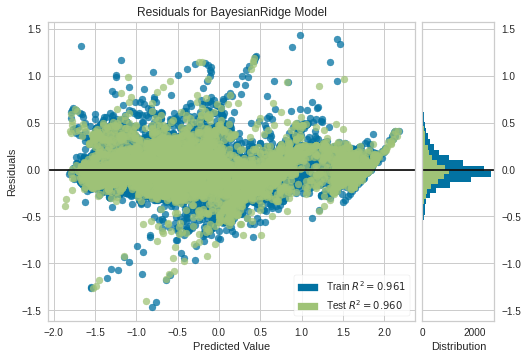

In [ ]:
plot_model(br, plot = 'residuals')

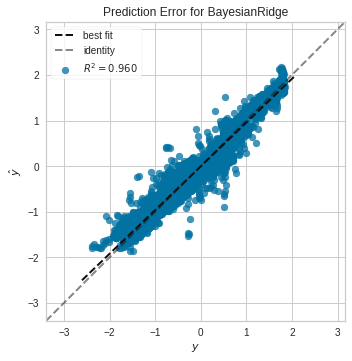

In [ ]:
plot_model(br, plot = 'error')

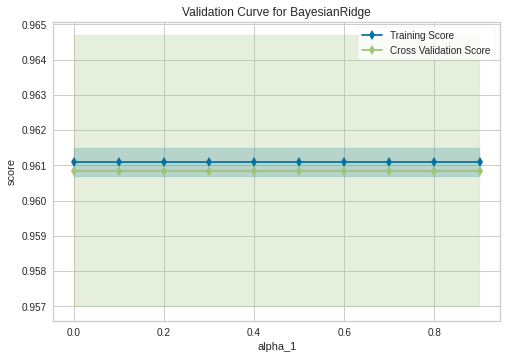

In [ ]:
plot_model(br, plot = 'vc')

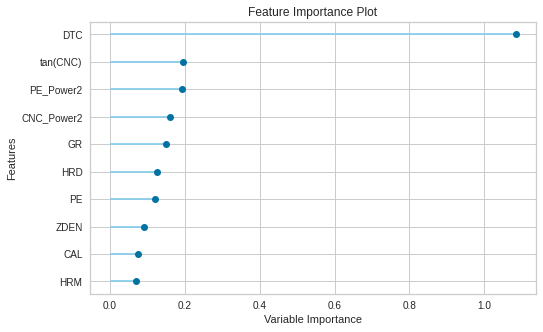

In [ ]:
plot_model(br, plot = 'feature')

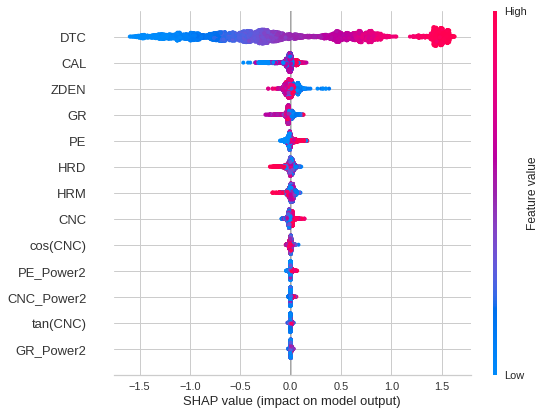

In [ ]:
interpret_model(lightgbm)

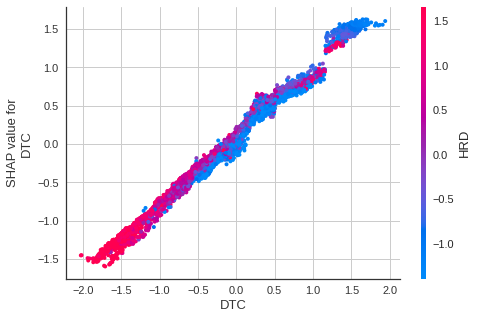

In [ ]:
interpret_model(lightgbm, plot = 'correlation', feature = 'DTC')

In [ ]:
interpret_model(lightgbm, plot = 'reason', observation = 0)

In [ ]:
# check predictions on hold-out
predict_model(blend_all);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,3.6399,51.1992,7.1554,0.9911,0.0317,0.0186


In [ ]:
final_blender1 = finalize_model(blend_all)
print(final_blender)

VotingRegressor(estimators=[('Huber Regressor_0',
                             HuberRegressor(alpha=0.4274, epsilon=1.9,
                                            fit_intercept=False, max_iter=100,
                                            tol=1e-05, warm_start=False)),
                            ('Orthogonal Matching Pursuit_1',
                             OrthogonalMatchingPursuit(fit_intercept=True,
                                                       n_nonzero_coefs=12,
                                                       normalize=False,
                                                       precompute='auto',
                                                       tol=None)),
                            ('Ridge_2',
                             Ridge(alpha=0.047, copy_X=True, fit_intercept=True,...
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           import

In [ ]:
predictions_DTS = predict_model(final_blender1, data = test_DTS)
predictions_DTS.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,Label
0,8.5781,0.3521,55.1824,0.8121,0.7810,6.8291,2.3256,108.5065,207.5382
1,8.5781,0.3639,57.0114,0.8038,0.7723,6.8100,2.3255,108.8330,207.5382
2,8.5781,0.3703,58.9263,0.7444,0.7048,6.7766,2.3212,109.7977,210.1359
3,8.5625,0.3667,57.3308,0.7169,0.6542,6.7219,2.3119,109.9252,202.4987
4,8.5781,0.3500,53.0624,0.6845,0.6109,6.6384,2.2982,110.3204,204.5714


In [ ]:
predictions_DTS.rename(columns={'Label': 'DTS'}, inplace = True)
predictions_DTS.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
0,8.5781,0.3521,55.1824,0.8121,0.7810,6.8291,2.3256,108.5065,207.5382
1,8.5781,0.3639,57.0114,0.8038,0.7723,6.8100,2.3255,108.8330,207.5382
2,8.5781,0.3703,58.9263,0.7444,0.7048,6.7766,2.3212,109.7977,210.1359
3,8.5625,0.3667,57.3308,0.7169,0.6542,6.7219,2.3119,109.9252,202.4987
4,8.5781,0.3500,53.0624,0.6845,0.6109,6.6384,2.2982,110.3204,204.5714


In [ ]:
prediction_20perc = predict_model(final_blender1, data = test20perc)
prediction_20perc.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,Label
0,8.6719,0.1199,6.7518,2.8285,3.0391,8.4395,2.5191,69.9345,122.0551
1,8.6719,0.3180,165.4345,1.3170,1.2206,7.1354,2.5517,97.6984,196.7869
2,8.7031,0.3164,58.3146,1.1627,1.8947,8.1722,2.4452,98.7449,193.1844
3,8.6250,0.1527,44.5126,2.5318,3.0052,7.6534,2.5674,77.7576,150.0327
4,8.6250,0.1731,16.1563,13.5082,13.0191,5.1534,2.2164,78.1032,139.6955


In [ ]:
prediction_20perc.rename(columns={'Label': 'DTS'}, inplace = True)
prediction_20perc.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
0,8.6719,0.1199,6.7518,2.8285,3.0391,8.4395,2.5191,69.9345,122.0551
1,8.6719,0.3180,165.4345,1.3170,1.2206,7.1354,2.5517,97.6984,196.7869
2,8.7031,0.3164,58.3146,1.1627,1.8947,8.1722,2.4452,98.7449,193.1844
3,8.6250,0.1527,44.5126,2.5318,3.0052,7.6534,2.5674,77.7576,150.0327
4,8.6250,0.1731,16.1563,13.5082,13.0191,5.1534,2.2164,78.1032,139.6955


In [ ]:
sample_submission = predictions_DTS.iloc[:,np.r_[7:9]]
sample_submission.head()

,DTC,DTS
0,108.5065,207.5382
1,108.8330,207.5382
2,109.7977,210.1359
3,109.9252,202.4987
4,110.3204,204.5714


In [ ]:
predicted20perc_DTC_DTS = prediction_20perc.iloc[:,np.r_[7:9]].values
print(predicted20perc_DTC_DTS)

[[ 69.9345 122.0551]
 [ 97.6984 196.7869]
 [ 98.7449 193.1844]
 ...
 [ 94.2659 173.0078]
 [ 63.172  116.2014]
 [ 70.6432 132.6461]]


In [ ]:
from sklearn.metrics import mean_squared_error
print('Root Mean Square Error is:', '{:.5f}'.format(np.sqrt(mean_squared_error(test20perc_DTC_DTS, predicted20perc_DTC_DTS, multioutput = 'uniform_average', squared = True))))

Root Mean Square Error is: 17.91241


In [ ]:
#saving an experiment
save_experiment('SWPLA_Pycaret')

Experiment Succesfully Saved
